# matplotlib 시각화

In [3]:
import matplotlib as mpl

print(mpl.__version__)

3.2.2


## 그래프 그리기

In [5]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]



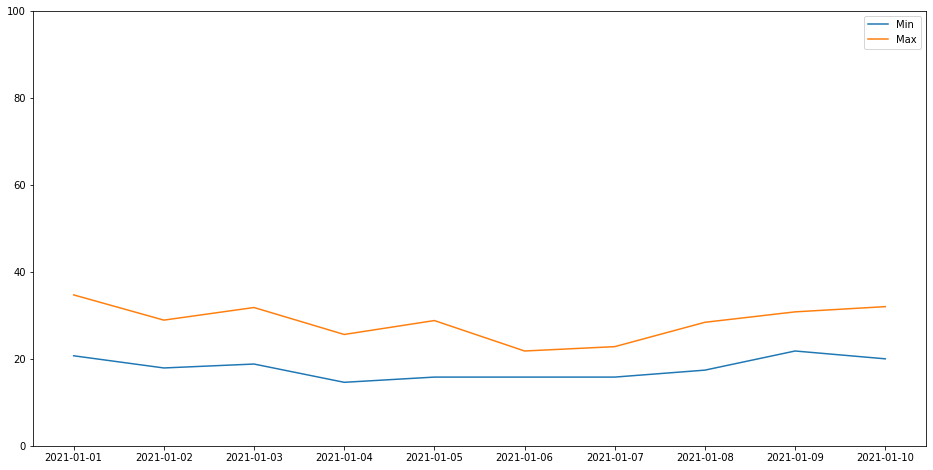

In [13]:
import matplotlib.pyplot as plt

# 그래프 그릴 때 제일먼저 아래코드를 선언해줘야 함. 무조건
# 객체 지향 문법
fig, ax = plt.subplots(figsize = (16, 8))

# 다양한 그래프를 작성
ax.plot(dates, min_temperature, label = 'Min')
ax.plot(dates, max_temperature, label = 'Max')
ax.set_ylim(0, 100)
ax.legend()

# 종료하는 문법
plt.show()

## 막대 그래프 그리기


Plot :  <BarContainer object of 12 artists>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>


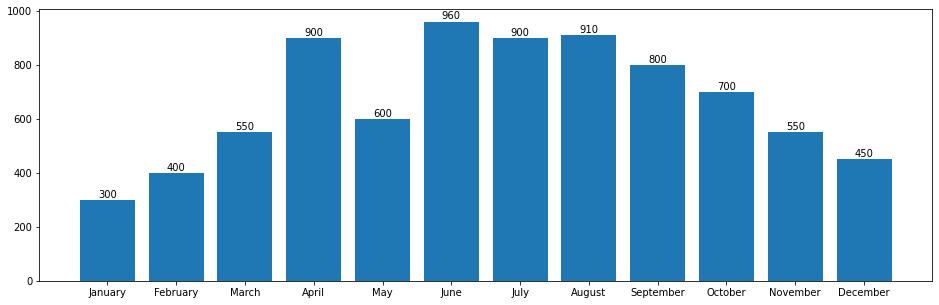

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sold_list = [300, 400, 550, 900, 600, 960, 900, 910, 800, 700, 550, 450]

labels = calendar.month_name[1:13]
# print(labels)

fig, ax = plt.subplots(figsize = (16, 5))
plot = ax.bar(month_list, sold_list)

print("Plot : ", plot)
for rect in plot:
  print(type(rect))
  # print(rect.get_height())
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,'%d' % 
    int(height), ha='center', va='bottom')

plt.xticks(month_list, labels)
plt.show()

In [12]:
print(type(ax))

<class 'matplotlib.axes._subplots.AxesSubplot'>


## Seaborn
- 실패한 라이브러리
- 배경 : pandas 데이터 프레임에서 한방에 시각화를 뭔가가 없을까?
- R에서는 ggplot2

In [30]:
import seaborn as sns 
print(sns.__version__)

0.11.2


In [32]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<class 'seaborn.axisgrid.FacetGrid'>
AxesSubplot(0.125,0.125;0.775x0.755)
<class 'matplotlib.axes._subplots.AxesSubplot'>


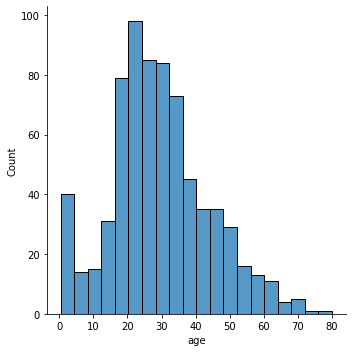

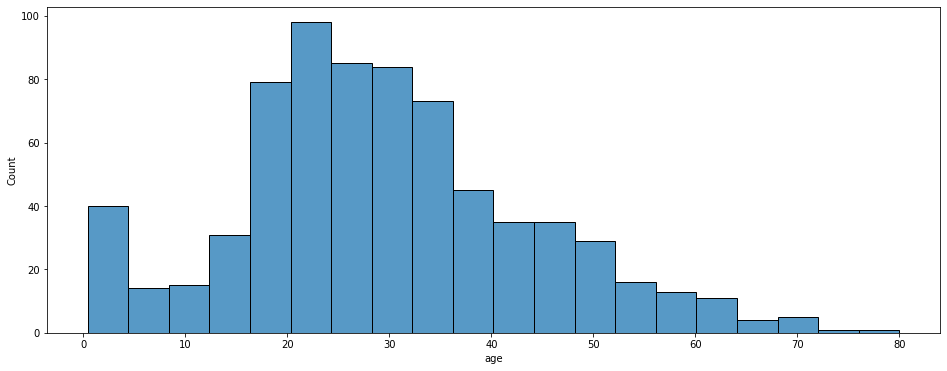

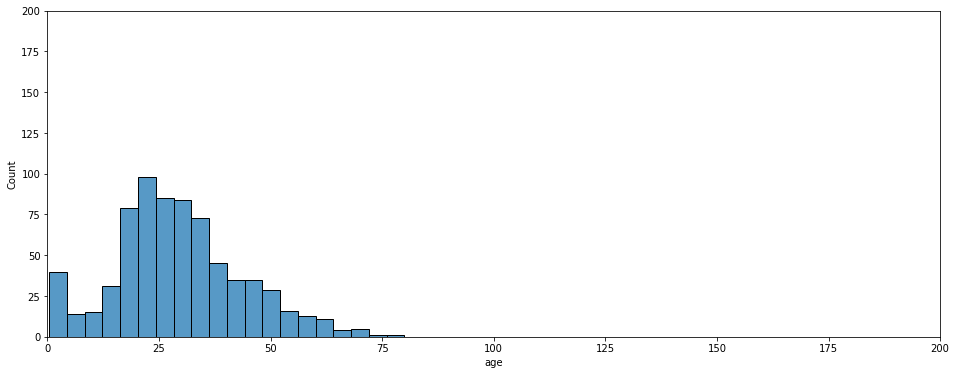

In [38]:
plot = sns.displot(titanic, x = "age")
print(type(plot))

# 
fig, ax = plt.subplots(figsize = (16, 6))
plot_2 = sns.histplot(titanic, x = "age", ax =ax)
print(plot_2)
print(type(plot_2))

fig, ax = plt.subplots(figsize = (16, 6)) # matplotlib
plot_2 = sns.histplot(titanic, x = "age", ax =ax) # seaborn
ax.set_xlim(0, 200) # matplotlib
ax.set_ylim(0, 200) # matplotlib

plt.show()

## 박스플롯


In [40]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


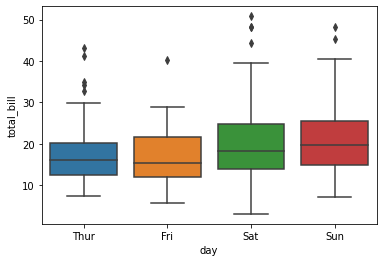

In [41]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips)

## 산점도 그래프
- x와 y는 모두 숫자여야 함.
- 년월일은 숫자 같지만 문자다..

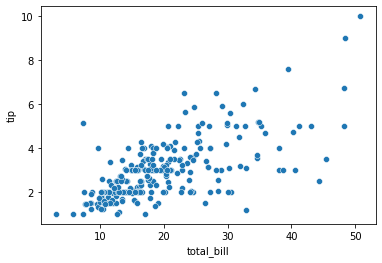

In [42]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = tips)

## 히트맵


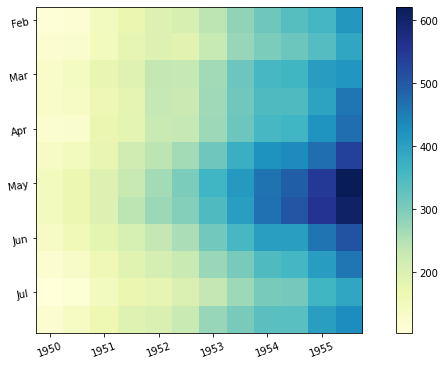

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(flights, cmap = 'YlGnBu')
ax.set_xticklabels(flights.columns, rotation = 20)
ax.set_yticklabels(flights.index, rotation = 10)
fig.colorbar(im)

fig.show()

## Plotly
- 접근하는 2가지 방법
 - import plotly.graph_objects as go # Matplotlib
 - import plotly.express as px # Seaborn

In [48]:
import plotly
print(plotly.__version__)

5.5.0


In [46]:
import plotly.graph_objects as go # Matplotlib
import plotly.express as px # Seaborn

In [49]:
import plotly.graph_objects as go # Matplotlib

weekly_sales = dict({
    "data": [{
        "type": "bar", 
        "x": ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], 
        "y": [28, 27, 25, 31, 32, 35, 36]
    }], 
    "layout" : {"title": {"text": "Sales of the week", 
                          "x": 0.5, "font": {"color": "red", "size": 25}}}
})

fig = go.Figure(weekly_sales)
fig.show()

In [77]:
fig = go.Figure()
# 산점도
fig.add_scatter(x = [1,2,3], y = [3,2,1])
fig.add_bar(x = [1,2,3], y = [3,2,1])
fig.show()

In [53]:
fig.show('json')

In [78]:
fig.layout.title = '그래프 제목'
fig.layout.title.font.size = 30
fig.layout.xaxis.title = 'X축 제목'
fig.layout.xaxis.title.font.size = 30
fig.layout.xaxis.title.font.color = '#E63DD9'
fig.show()

## 테마 변경


In [79]:
# fig.layout.template = 'presentation'
fig.layout.template.layout.plot_bgcolor = '#000000'
fig.layout.xaxis.gridcolor = '#F6FF53'
fig.layout.xaxis.linecolor = 'red'
fig.layout.yaxis.linecolor = 'red'
# fig.layout.yaxis.linewidth = 5
fig.show()

In [61]:
plotly.io.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

## express 방식


In [72]:
iris = px.data.iris()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [80]:
fig = px.scatter(iris, x = 'sepal_length', y = 'sepal_width')
fig.show()

In [81]:
fig.add_bar(x = [1,2,3], y = [3,2,1])
fig.layout.title = '그래픽 제목'
fig.layout.xaxis.title = 'x축 제목'
fig.layout.yaxis.title = 'y축 제목'
fig.layout.template.layout.plot_bgcolor = '#000000'
fig.layout.xaxis.gridcolor = '#F6FF53'
fig.layout.xaxis.linecolor = 'red'
fig.layout.yaxis.linecolor = 'red'
fig.layout.yaxis.linewidth = 5
fig.show()

In [45]:
# x and y given as array_like objects
import plotly.express as px
fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
fig.show()